# Lab 8: Define and Solve an ML Problem of Your Choosing

In [1]:
import pandas as pd
import numpy as np
import os 
import matplotlib.pyplot as plt
import seaborn as sns

In this lab assignment, you will follow the machine learning life cycle and implement a model to solve a machine learning problem of your choosing. You will select a data set and choose a predictive problem that the data set supports.  You will then inspect the data with your problem in mind and begin to formulate a  project plan. You will then implement the machine learning project plan. 

You will complete the following tasks:

1. Build Your DataFrame
2. Define Your ML Problem
3. Perform exploratory data analysis to understand your data.
4. Define Your Project Plan
5. Implement Your Project Plan:
    * Prepare your data for your model.
    * Fit your model to the training data and evaluate your model.
    * Improve your model's performance.

## Part 1: Build Your DataFrame

You will have the option to choose one of four data sets that you have worked with in this program:

* The "census" data set that contains Census information from 1994: `censusData.csv`
* Airbnb NYC "listings" data set: `airbnbListingsData.csv`
* World Happiness Report (WHR) data set: `WHR2018Chapter2OnlineData.csv`
* Book Review data set: `bookReviewsData.csv`

Note that these are variations of the data sets that you have worked with in this program. For example, some do not include some of the preprocessing necessary for specific models. 

#### Load a Data Set and Save it as a Pandas DataFrame

The code cell below contains filenames (path + filename) for each of the four data sets available to you.

<b>Task:</b> In the code cell below, use the same method you have been using to load the data using `pd.read_csv()` and save it to DataFrame `df`. 

You can load each file as a new DataFrame to inspect the data before choosing your data set.

In [2]:
# File names of the four data sets
adultDataSet_filename = os.path.join(os.getcwd(), "data", "censusData.csv")
airbnbDataSet_filename = os.path.join(os.getcwd(), "data", "airbnbListingsData.csv")
WHRDataSet_filename = os.path.join(os.getcwd(), "data", "WHR2018Chapter2OnlineData.csv")
bookReviewDataSet_filename = os.path.join(os.getcwd(), "data", "bookReviewsData.csv")

df = pd.read_csv(airbnbDataSet_filename)

df.head()

,name,description,neighborhood_overview,host_name,host_location,host_about,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
0,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,Jennifer,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,0.80,0.17,True,8.0,...,4.79,4.86,4.41,False,3,3,0,0,0.33,9
1,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,LisaRoxanne,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,0.09,0.69,True,1.0,...,4.80,4.71,4.64,False,1,1,0,0,4.86,6
2,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,Rebecca,"Brooklyn, New York, United States","Rebecca is an artist/designer, and Henoch is i...",1.00,0.25,True,1.0,...,5.00,4.50,5.00,False,1,1,0,0,0.02,3
3,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",Shunichi,"New York, New York, United States",I used to work for a financial industry but no...,1.00,1.00,True,1.0,...,4.42,4.87,4.36,False,1,0,1,0,3.68,4
4,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,MaryEllen,"New York, New York, United States",Welcome to family life with my oldest two away...,NaN,NaN,True,1.0,...,4.95,4.94,4.92,False,1,0,1,0,0.87,7


## Part 2: Define Your ML Problem

Next you will formulate your ML Problem. In the markdown cell below, answer the following questions:

1. List the data set you have chosen.
2. What will you be predicting? What is the label?
3. Is this a supervised or unsupervised learning problem? Is this a clustering, classification or regression problem? Is it a binary classificaiton or multi-class classifiction problem?
4. What are your features? (note: this list may change after your explore your data)
5. Explain why this is an important problem. In other words, how would a company create value with a model that predicts this label?

In [4]:
df.columns

Index(['name', 'description', 'neighborhood_overview', 'host_name',
       'host_location', 'host_about', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_listings_count',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_group_cleansed', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_scores_value',

In [5]:
df['accommodates']

0        1
1        3
2        4
3        2
4        1
        ..
28017    2
28018    6
28019    2
28020    3
28021    1
Name: accommodates, Length: 28022, dtype: int64

In [6]:
df['bedrooms']

0        NaN
1        1.0
2        2.0
3        1.0
4        1.0
        ... 
28017    1.0
28018    2.0
28019    1.0
28020    1.0
28021    1.0
Name: bedrooms, Length: 28022, dtype: float64

In [7]:
df['neighbourhood_group_cleansed']

0        Manhattan
1         Brooklyn
2         Brooklyn
3        Manhattan
4        Manhattan
           ...    
28017       Queens
28018     Brooklyn
28019     Brooklyn
28020     Brooklyn
28021       Queens
Name: neighbourhood_group_cleansed, Length: 28022, dtype: object

1. This project uses the Airbnb NYC "listings" dataset
2. This model predicts the number of people the listing accommodates. Therefore, the label is accommodates
3. This is a supervised problem and a regression problem
4. Features will inlcude price, bedrooms, bathrooms, beds, neighborhood_group_cleansed, and room_type
5. By accurately predicting the number of people the Airbnb listing accomodates, Airbnb can improve search algorithms to better match users with properties that meet their needs. The model can be used to refine the recommendation system, ensuring users see listings that are most relevant to their preferences, leading to a better user experience. Also, knowing the number of accommodates accurately can help Airbnb implement more effective dynamic pricing models if needed. Accurate accommodates information allows for better revenue management and maximization by ensuring prices are set optimally for different types of properties

## Part 3: Understand Your Data

The next step is to perform exploratory data analysis. Inspect and analyze your data set with your machine learning problem in mind. Consider the following as you inspect your data:

1. What data preparation techniques would you like to use? These data preparation techniques may include:

    * addressing missingness, such as replacing missing values with means
    * finding and replacing outliers
    * renaming features and labels
    * finding and replacing outliers
    * performing feature engineering techniques such as one-hot encoding on categorical features
    * selecting appropriate features and removing irrelevant features
    * performing specific data cleaning and preprocessing techniques for an NLP problem
    * addressing class imbalance in your data sample to promote fair AI
    

2. What machine learning model (or models) you would like to use that is suitable for your predictive problem and data?
    * Are there other data preparation techniques that you will need to apply to build a balanced modeling data set for your problem and model? For example, will you need to scale your data?
 
 
3. How will you evaluate and improve the model's performance?
    * Are there specific evaluation metrics and methods that are appropriate for your model?
    

Think of the different techniques you have used to inspect and analyze your data in this course. These include using Pandas to apply data filters, using the Pandas `describe()` method to get insight into key statistics for each column, using the Pandas `dtypes` property to inspect the data type of each column, and using Matplotlib and Seaborn to detect outliers and visualize relationships between features and labels. If you are working on a classification problem, use techniques you have learned to determine if there is class imbalance.

<b>Task</b>: Use the techniques you have learned in this course to inspect and analyze your data. You can import additional packages that you have used in this course that you will need to perform this task.

<b>Note</b>: You can add code cells if needed by going to the <b>Insert</b> menu and clicking on <b>Insert Cell Below</b> in the drop-drown menu.

1. I will address missingness, find and replace outliers,  perform one-hot encoding, select approriate features and remove irrelevant features
2. Models I will use include Linear Regression, Decision Tree Regressor, Stacking Regressor, Gradient Boosted Trees, and Random Forest
3. I will evaluate and improve the model's performance by testing many different combinations of the hyperparameters using GridSearchCV for each model. I will also calculate the RMSE and R2 to guage each model's performance

In [8]:
# YOUR CODE HERE
print(df.shape)
print(df.columns)
print(df.dtypes)
df.head(10)

(28022, 50)
Index(['name', 'description', 'neighborhood_overview', 'host_name',
       'host_location', 'host_about', 'host_response_rate',
       'host_acceptance_rate', 'host_is_superhost', 'host_listings_count',
       'host_total_listings_count', 'host_has_profile_pic',
       'host_identity_verified', 'neighbourhood_group_cleansed', 'room_type',
       'accommodates', 'bathrooms', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'has_availability', 'availability_30',
       'availability_60', 'availability_90', 'availability_365',
       'number_of_reviews', 'number_of_reviews_ltm', 'number_of_reviews_l30d',
       'review_scores_rating', 'review_scores_cleanliness',
       'review_scores_checkin', 'review_scores_communication',
       'review_scores_location', 'review_sc

,name,description,neighborhood_overview,host_name,host_location,host_about,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,...,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,n_host_verifications
0,Skylit Midtown Castle,"Beautiful, spacious skylit studio in the heart...",Centrally located in the heart of Manhattan ju...,Jennifer,"New York, New York, United States",A New Yorker since 2000! My passion is creatin...,0.80,0.17,True,8.0,...,4.79,4.86,4.41,False,3,3,0,0,0.33,9
1,"Whole flr w/private bdrm, bath & kitchen(pls r...","Enjoy 500 s.f. top floor in 1899 brownstone, w...",Just the right mix of urban center and local n...,LisaRoxanne,"New York, New York, United States",Laid-back Native New Yorker (formerly bi-coast...,0.09,0.69,True,1.0,...,4.80,4.71,4.64,False,1,1,0,0,4.86,6
2,"Spacious Brooklyn Duplex, Patio + Garden",We welcome you to stay in our lovely 2 br dupl...,NaN,Rebecca,"Brooklyn, New York, United States","Rebecca is an artist/designer, and Henoch is i...",1.00,0.25,True,1.0,...,5.00,4.50,5.00,False,1,1,0,0,0.02,3
3,Large Furnished Room Near B'way,Please don’t expect the luxury here just a bas...,"Theater district, many restaurants around here.",Shunichi,"New York, New York, United States",I used to work for a financial industry but no...,1.00,1.00,True,1.0,...,4.42,4.87,4.36,False,1,0,1,0,3.68,4
4,Cozy Clean Guest Room - Family Apt,"Our best guests are seeking a safe, clean, spa...",Our neighborhood is full of restaurants and ca...,MaryEllen,"New York, New York, United States",Welcome to family life with my oldest two away...,NaN,NaN,True,1.0,...,4.95,4.94,4.92,False,1,0,1,0,0.87,7
5,"Lovely Room 1, Garden, Best Area, Legal rental","Beautiful house, gorgeous garden, patio, cozy ...",Neighborhood is amazing!<br />Best subways to ...,Laurie,"New York, New York, United States","Hello, \r\nI will be welcoming and helpful, w...",1.00,1.00,True,3.0,...,4.82,4.87,4.73,False,3,1,2,0,1.48,7
6,Only 2 stops to Manhattan studio,Comfortable studio apartment with super comfor...,NaN,Allen & Irina,"New York, New York, United States",We love to travel. When we travel we like to s...,1.00,1.00,True,1.0,...,4.80,4.67,4.57,True,1,1,0,0,1.24,7
7,UES Beautiful Blue Room,Beautiful peaceful healthy home<br /><br /><b>...,"Location: Five minutes to Central Park, Museum...",Cyn,"New York, New York, United States",Capturing the Steinbeck side of life in its Fi...,1.00,1.00,True,3.0,...,4.95,4.84,4.84,True,1,0,1,0,1.82,5
8,"Amazing location! Wburg. Large, bright & tranquil","Large, private loft-like room in a spacious 2-...","- One stop from the East Village, Lower East S...",Joelle,"New York, New York, United States",I have lived in the same apartment in Brooklyn...,1.00,0.00,True,2.0,...,5.00,5.00,5.00,False,2,0,2,0,0.07,5
9,Perfect for Your Parents: Privacy + Garden,"Parents/grandparents coming to town, or are yo...","Residential, village-like atmosphere. Lots of ...",Jane,"New York, New York, United States",I have been an Airbnb host since 2009 -- just ...,1.00,0.99,True,1.0,...,4.91,4.93,4.78,True,2,1,1,0,3.05,8


In [9]:
df['price']

0         150.0
1          75.0
2         275.0
3          68.0
4          75.0
          ...  
28017      89.0
28018    1000.0
28019      64.0
28020      84.0
28021      70.0
Name: price, Length: 28022, dtype: float64

## Part 4: Define Your Project Plan

Now that you understand your data, in the markdown cell below, define your plan to implement the remaining phases of the machine learning life cycle (data preparation, modeling, evaluation) to solve your ML problem. Answer the following questions:

* Do you have a new feature list? If so, what are the features that you chose to keep and remove after inspecting the data? 
* Explain different data preparation techniques that you will use to prepare your data for modeling.
* What is your model (or models)?
* Describe your plan to train your model, analyze its performance and then improve the model. That is, describe your model building, validation and selection plan to produce a model that generalizes well to new data. 

1. My original feature list inlcudes price, bedrooms, bathrooms, beds, neighborhood_group_cleansed, and room_type. However, once I calculated the correlation between each feature and the label, I decided to remove neighborhood_group_cleansed and room_type as shown below. 

2. I will address missingness, finding and replacing outliers, and use one-hot encoding

3. Models I will use include Linear Regression, Decision Tree Regressor, Stacking Regressor, Gradient Boosted Trees, and Random Forest.
   
4. To train each model listed above, I will use GridSearchCV to find the optimal hyperparameter values. Once GridSearchCV identifies the optimal parameters in the lists, I will do trials with varied hyperparameters around the ones identifed by GridSearchCV to make sure that the best hyperparameters are selected. To analyze each model's performance, I set aside 30% of the data to be testing data. I will use RMSE and R2 metrics to analyze each model's performance to ensure it works well. The model will be improved upon until appropriate RMSE and R2 metrics are met. 

## Part 5: Implement Your Project Plan

<b>Task:</b> In the code cell below, import additional packages that you have used in this course that you will need to implement your project plan.

In [3]:
from sklearn.model_selection import train_test_split, cross_val_score,GridSearchCV
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import scipy.stats as stats
from sklearn.ensemble import StackingRegressor
from sklearn.metrics import accuracy_score

<b>Task:</b> Use the rest of this notebook to carry out your project plan. 

You will:

1. Prepare your data for your model.
2. Fit your model to the training data and evaluate your model.
3. Improve your model's performance by performing model selection and/or feature selection techniques to find best model for your problem.

Add code cells below and populate the notebook with commentary, code, analyses, results, and figures as you see fit. 

In [4]:
#Change df so that it only contains the columns we want to focus on
cols = ['price', 'bedrooms', 'bathrooms', 'beds', 'neighbourhood_group_cleansed', 'room_type', 'accommodates']
df = df[cols]

In [5]:
#Detect and replace outliers using winsorization
df['updated_price'] = stats.mstats.winsorize(df['price'], limits=[0.01, 0.01])

In [6]:
#Verifying windsorization worked
(df['price']-df['updated_price']).unique()

array([  0.,   1., 101.,  51.,  -1., 100.,  58.,  81.,  26.,  96.,  15.,
        25.,  41.,   6.,   7.,  46.,  83.,  99.,  44.,  43.,  93.,  78.,
        71.,   2.,  87.,  86.,  50.,  12.])

In [7]:
#Check for null values
nan_count = np.sum(df.isnull(), axis=0)
nan_count

price                              0
bedrooms                        2918
bathrooms                          0
beds                            1354
neighbourhood_group_cleansed       0
room_type                          0
accommodates                       0
updated_price                      0
dtype: int64

In [8]:
#Identify which columns to replace missing values with the mean
nan_detected = nan_count != 0
is_int_or_float = (df.dtypes == 'int64') | (df.dtypes == 'float64')
to_impute = nan_detected & is_int_or_float
to_impute

price                           False
bedrooms                         True
bathrooms                       False
beds                             True
neighbourhood_group_cleansed    False
room_type                       False
accommodates                    False
updated_price                   False
dtype: bool

In [9]:
#Replace the missing values with the mean for the selected columns
to_impute_selected = ['bedrooms', 'beds']
for colname in to_impute_selected:
    df[colname].fillna(np.mean(df[colname]), inplace=True)

In [10]:
#Recheck to verify there are no more missing values
for colname in to_impute_selected:
    print("{} missing values count :{}".format(colname, np.sum(df[colname].isnull(), axis = 0)))

bedrooms missing values count :0
beds missing values count :0


In [11]:
print(df['room_type'].unique())
print(df['neighbourhood_group_cleansed'].unique())

['Entire home/apt' 'Private room' 'Hotel room' 'Shared room']
['Manhattan' 'Brooklyn' 'Queens' 'Staten Island' 'Bronx']


In [12]:
#Perform one-hot encoding
df_room_type = pd.get_dummies(df['room_type'], prefix='room_type_')
df = df.join(df_room_type)
df.drop(columns='room_type', inplace=True)

df_neighbourhood_group = pd.get_dummies(df['neighbourhood_group_cleansed'], prefix='neighbourhood_group_')
df = df.join(df_neighbourhood_group)
df.drop(columns='neighbourhood_group_cleansed', inplace=True)

In [13]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'beds', 'accommodates',
       'updated_price', 'room_type__Entire home/apt', 'room_type__Hotel room',
       'room_type__Private room', 'room_type__Shared room',
       'neighbourhood_group__Bronx', 'neighbourhood_group__Brooklyn',
       'neighbourhood_group__Manhattan', 'neighbourhood_group__Queens',
       'neighbourhood_group__Staten Island'],
      dtype='object')

In [13]:
#Identifying correlations with the label
corr_matrix = round(df.corr(),5)
corrs = corr_matrix['accommodates']
corrs_sorted = corrs.sort_values(ascending=False)
corrs_sorted

accommodates                          1.00000
beds                                  0.75362
bedrooms                              0.72124
updated_price                         0.52443
price                                 0.51906
room_type__Entire home/apt            0.45266
bathrooms                             0.36944
neighbourhood_group__Brooklyn         0.02700
neighbourhood_group__Staten Island    0.01391
neighbourhood_group__Queens          -0.00212
neighbourhood_group__Bronx           -0.00831
room_type__Hotel room                -0.01507
neighbourhood_group__Manhattan       -0.02531
room_type__Shared room               -0.06092
room_type__Private room              -0.43853
Name: accommodates, dtype: float64

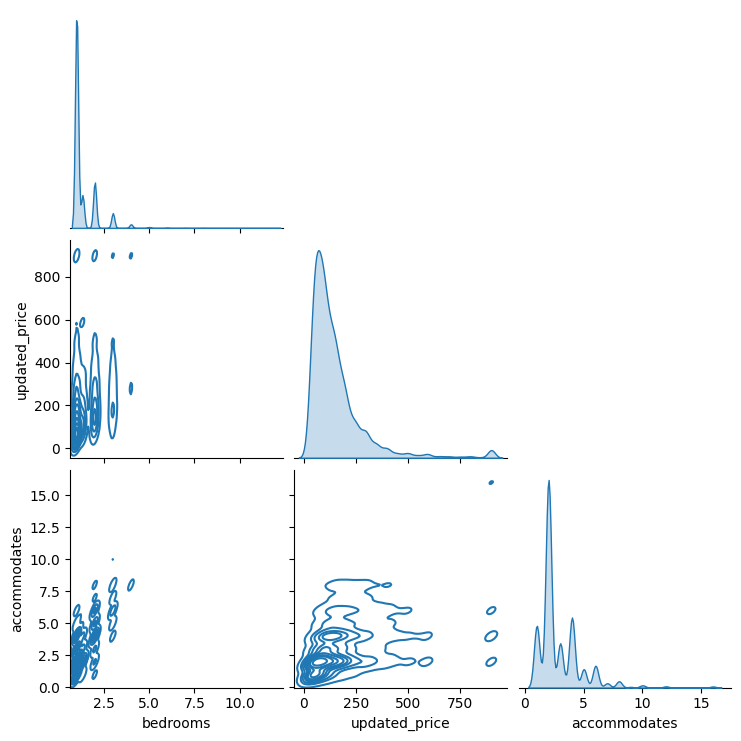

In [22]:
#Visualize the top two correlated features
top_two_corr = list(corrs_sorted[2:4].index)
df_corrs = df[top_two_corr].copy()
df_corrs['accommodates'] = df['accommodates']
sns.pairplot(data=df_corrs, kind='kde', corner=True)

In [15]:
#Create labeled examples from the data set and drop the low correlated features
to_be_dropped = ['accommodates','neighbourhood_group__Brooklyn', 'neighbourhood_group__Staten Island', 'neighbourhood_group__Queens', 'neighbourhood_group__Bronx', 'neighbourhood_group__Manhattan','room_type__Hotel room','room_type__Shared room'] 
y = df['accommodates']
X = df.drop(columns=to_be_dropped, axis=1)

In [16]:
#Create training and test data sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,random_state=1234)

In [16]:
#Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_lr_pred = lr_model.predict(X_test)

In [17]:
#Calculate RMSE and R2 for the Linear Regression model
lr_rmse = mean_squared_error(y_test, y_lr_pred, squared=False)
lr_r2 = r2_score(y_test, y_lr_pred)

print('[LR] Root Mean Squared Error: {0}'.format(lr_rmse))
print('[LR] R2: {0}'.format(lr_r2))

[LR] Root Mean Squared Error: 1.0604068755094889
[LR] R2: 0.684419345168702


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [17]:
#Decision Tree Regressor model hyperparameter testing
md = [2, 4, 8, 10, 12, 16]
msl = [5, 10, 25, 50, 75, 100]
param_grid = {'max_depth':md, 'min_samples_leaf':msl}

print('Running Grid Search...')
dt_regressor = DecisionTreeRegressor()
dt_grid = GridSearchCV(dt_regressor, param_grid, cv=3, scoring='neg_root_mean_squared_error', verbose=1)
dt_grid_search = dt_grid.fit(X_train, y_train)

print('Done')

Running Grid Search...
Fitting 3 folds for each of 36 candidates, totalling 108 fits
Done


In [18]:
#Calculate best RMSE for the Decision Tree Regressor model
rmse_DT = -1 * dt_grid_search.best_score_
print("[DT] RMSE for the best model is : {:.2f}".format(rmse_DT))

[DT] RMSE for the best model is : 1.04


In [19]:
dt_best_params = dt_grid_search.best_params_
dt_best_params

{'max_depth': 8, 'min_samples_leaf': 25}

In [20]:
#Trial - Trying different hyperparameter values
dt_model = DecisionTreeRegressor(max_depth=8, min_samples_leaf=40)
dt_model.fit(X_train, y_train)
y_dt_pred = dt_model.predict(X_test)

dt_rmse = mean_squared_error(y_test, y_dt_pred, squared=False)
dt_r2 = r2_score(y_test, y_dt_pred)
print('[DT] Root Mean Squared Error: {0}'.format(dt_rmse))
print('[DT] R2: {0}'.format(dt_r2))

[DT] Root Mean Squared Error: 1.0461898856367944
[DT] R2: 0.6928246674346636


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Notes:

md=8 and msl = 25
[DT] Root Mean Squared Error: 1.0527736883286667
[DT] R2: 0.6889463173206936

md=8 and msl = 20
[DT] Root Mean Squared Error: 1.0583217648587189
[DT] R2: 0.6856591968835333

md=8 and msl = 30
[DT] Root Mean Squared Error: 1.054038274022878
[DT] R2: 0.6881985967252531

md=8 and msl=36
[DT] Root Mean Squared Error: 1.05296959982266
[DT] R2: 0.6888305380939629

md=8 and msl=40
[DT] Root Mean Squared Error: 1.0461898856367944
[DT] R2: 0.6928246674346636

md=6 and msl=40
[DT] Root Mean Squared Error: 1.0502208228427812
[DT] R2: 0.6904530332302643

md=10 and msl = 40
[DT] Root Mean Squared Error: 1.0489279947275285
[DT] R2: 0.6912146724858597

md=8 and msl=40 had the best results

In [20]:
#Decision Tree Regressor model
dt_model = DecisionTreeRegressor(max_depth=8, min_samples_leaf=40)
dt_model.fit(X_train, y_train)
y_dt_pred = dt_model.predict(X_test)

In [21]:
#Calculate RMSE and R2 for the Decision Tree Regressor model
dt_rmse = mean_squared_error(y_test, y_dt_pred, squared=False)
dt_r2 = r2_score(y_test, y_dt_pred)
print('[DT] Root Mean Squared Error: {0}'.format(dt_rmse))
print('[DT] R2: {0}'.format(dt_r2))

[DT] Root Mean Squared Error: 1.0461898856367944
[DT] R2: 0.6928246674346636


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [22]:
#Stacking Regressor model
estimators = [("DT", DecisionTreeRegressor(max_depth=8, min_samples_leaf=40)), ("LR", LinearRegression())]

print('Implement Stacking...')
stacking_model = StackingRegressor(estimators=estimators, passthrough=False)
stacking_model.fit(X_train, y_train)
print('End')

stacking_pred = stacking_model.predict(X_test)

Implement Stacking...
End


In [23]:
#Calculate RMSE and R2 for the Stacking Regressor model
stack_rmse = np.sqrt(mean_squared_error(y_test, stacking_pred))
stack_r2 = r2_score(y_test, stacking_pred)
print('Root Mean Squared Error: {0}'.format(stack_rmse))
print('R2: {0}'.format(stack_r2))

Root Mean Squared Error: 1.0364345447854122
R2: 0.6985265557962483


In [18]:
#Gradient Boosting Regressor model hyperparameter testing
md = [1, 2, 4, 8]
n_est = [200, 250, 300, 350]
param_grid = {'max_depth':md, 'n_estimators':n_est}

print('Running Grid Search...')
gbdt_regressor = GradientBoostingRegressor()
gbdt_grid = GridSearchCV(gbdt_regressor, param_grid, cv=3, scoring='neg_root_mean_squared_error', verbose=1)
gbdt_grid_search = gbdt_grid.fit(X_train, y_train)

print('Done')

Running Grid Search...
Fitting 3 folds for each of 16 candidates, totalling 48 fits
Done


In [19]:
#Calculate best RMSE for the Gradient Boosting Regressor model
rmse_GBDT = -1 * gbdt_grid_search.best_score_
print("[GBDT] RMSE for the best model is : {:.2f}".format(rmse_GBDT))

#Gradient Boosting Regressor model
gbdt_best_params = gbdt_grid_search.best_params_

[GBDT] RMSE for the best model is : 1.03


In [20]:
gbdt_best_params

{'max_depth': 2, 'n_estimators': 200}

In [35]:
#trial
print('Begin GBDT Implementation...')
gbdt_model = GradientBoostingRegressor(max_depth=3, n_estimators=350)
gbdt_model.fit(X_train, y_train)
print('End')

y_gbdt_pred = gbdt_model.predict(X_test)

gbdt_rmse = mean_squared_error(y_test, y_gbdt_pred, squared=False)
gbdt_r2 = r2_score(y_test, y_gbdt_pred)

print('[GBDT] Root Mean Squared Error: {0}'.format(gbdt_rmse))
print('[GBDT] R2: {0}'.format(gbdt_r2))


Begin GBDT Implementation...
End
[GBDT] Root Mean Squared Error: 0.9970383497910598
[GBDT] R2: 0.7210097477949085


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Notes:

md=2, n_est = 210
[GBDT] Root Mean Squared Error: 1.033012028526291
[GBDT] R2: 0.7005143208072206

md=2, n_est = 220
[GBDT] Root Mean Squared Error: 1.0328493062532556
[GBDT] R2: 0.7006086646306254

md=2 n_est = 240
[GBDT] Root Mean Squared Error: 1.030676483640156
[GBDT] R2: 0.7018670089026422

md=2 n_est=260
[GBDT] Root Mean Squared Error: 1.0290599944318244
[GBDT] R2: 0.7028014453575842

md=2 n_est=280
[GBDT] Root Mean Squared Error: 1.028297050771044
[GBDT] R2: 0.7032419671930255

md=2 n_est=300
[GBDT] Root Mean Squared Error: 1.0277305477525847
[GBDT] R2: 0.7035688533062605

md=2 n_est=320
[GBDT] Root Mean Squared Error: 1.02689028865774
[GBDT] R2: 0.7040533716378239

md=2 n_est=500
[GBDT] Root Mean Squared Error: 1.0226198656801042
[GBDT] R2: 0.7065096991392119

md=2 n_est=600
[GBDT] Root Mean Squared Error: 1.020645615934478
[GBDT] R2: 0.7076418184335661

md=3 n_est=600
[GBDT] Root Mean Squared Error: 0.9987171879487352
[GBDT] R2: 0.7200694152276141

md=3 n_est=560
[GBDT] Root Mean Squared Error: 0.999150407994326
[GBDT] R2: 0.7198265079370754

md=3 n_est=500
[GBDT] Root Mean Squared Error: 0.9979389523986703
[GBDT] R2: 0.7205055087610088

md=3 n_est=450
[GBDT] Root Mean Squared Error: 0.9980904263818173
[GBDT] R2: 0.7204206551599179

md=3 n_est=400
[GBDT] Root Mean Squared Error: 0.997305113204332
[GBDT] R2: 0.7208604368916656

md=3 n_est=320
[GBDT] Root Mean Squared Error: 0.9961982440596029
[GBDT] R2: 0.7214797047729087

md=3 n_est=322
[GBDT] Root Mean Squared Error: 0.9956611906471085
[GBDT] R2: 0.7217799260517728

md=3 and n_est=322 had the best results


In [52]:
#Train the GBDT model
print('Begin GBDT Implementation...')
gbdt_model = GradientBoostingRegressor(max_depth=3, n_estimators=322)
gbdt_model.fit(X_train, y_train)
print('End')

y_gbdt_pred = gbdt_model.predict(X_test)

Begin GBDT Implementation...
End


In [53]:
#Calculate RMSE and R2 for the Gradient Boosting Regressor model
gbdt_rmse = mean_squared_error(y_test, y_gbdt_pred, squared=False)
gbdt_r2 = r2_score(y_test, y_gbdt_pred)

print('[GBDT] Root Mean Squared Error: {0}'.format(gbdt_rmse))
print('[GBDT] R2: {0}'.format(gbdt_r2))

[GBDT] Root Mean Squared Error: 0.995656311696802
[GBDT] R2: 0.7217826527194424


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [36]:
#Random Forest model hyperparameter testing
md = [20, 30, 32, 40, 45]
n_est = [250, 300, 350]
param_grid = {'max_depth':md, 'n_estimators':n_est}

print('Running Grid Search...')
rf_regressor = RandomForestRegressor()
rf_grid = GridSearchCV(rf_regressor, param_grid, cv=3, scoring='neg_root_mean_squared_error', verbose=1)
rf_grid_search = rf_grid.fit(X_train, y_train)

print('Done')

Running Grid Search...
Fitting 3 folds for each of 15 candidates, totalling 45 fits
Done


In [37]:
#Calculate best RMSE for the Random Forest Regressor model
rmse_RF = -1 * rf_grid_search.best_score_
print("[RF] RMSE for the best model is : {:.2f}".format(rmse_RF))

#Random Forest Regressor model
rf_best_params = rf_grid_search.best_params_
rf_best_params

[RF] RMSE for the best model is : 1.10


{'max_depth': 20, 'n_estimators': 250}

In [71]:
#Trial
print('Begin RF Implementation')
rf_model = RandomForestRegressor(max_depth=20, n_estimators=249)
rf_model.fit(X_train, y_train)
print('End')

y_rf_pred = rf_model.predict(X_test)

rf_rmse = mean_squared_error(y_test, y_rf_pred, squared=False)
rf_r2 = r2_score(y_test, y_rf_pred)

print('[RF] Root Mean Squared Error: {0}'.format(rf_rmse))
print('[RF] R2: {0}'.format(rf_r2))

Begin RF Implementation
End
[RF] Root Mean Squared Error: 1.0684051741193137
[RF] R2: 0.6796407500298973


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Notes:

md=20 n_est=250
[RF] Root Mean Squared Error: 1.0691476540365505
[RF] R2: 0.6791953329451443

md=20 n_est=200
[RF] Root Mean Squared Error: 1.0695026160172059
[RF] R2: 0.678982280308589

md=20 n_est=255
[RF] Root Mean Squared Error: 1.0682322347121398
[RF] R2: 0.6797444527377845

md=20 n_est=248
[RF] Root Mean Squared Error: 1.0683565702292162
[RF] R2: 0.6796698969340553

md=20 n_est=249
[RF] Root Mean Squared Error: 1.0676000719977186
[RF] R2: 0.6801233847809983

md=20 and n_est=249 had the best results

In [28]:
#Train the model
print('Begin RF Implementation')
rf_model = RandomForestRegressor(max_depth=20, n_estimators=249)
rf_model.fit(X_train, y_train)
print('End')

y_rf_pred = rf_model.predict(X_test)

Begin RF Implementation
End


In [29]:
#Calculate RMSE and R2 for the Random Forest Regressor model
rf_rmse = mean_squared_error(y_test, y_rf_pred, squared=False)
rf_r2 = r2_score(y_test, y_rf_pred)

print('[RF] Root Mean Squared Error: {0}'.format(rf_rmse))
print('[RF] R2: {0}'.format(rf_r2))

[RF] Root Mean Squared Error: 1.0684832775042836
[RF] R2: 0.679593910016403


/home/ubuntu/.pyenv/versions/3.9.19/lib/python3.9/site-packages/sklearn/metrics/_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


In [17]:
#Second Stacking Regressor model
estimators2 = [("DT", DecisionTreeRegressor(max_depth=8, min_samples_leaf=40)), ("LR", LinearRegression()), ("GBDT", GradientBoostingRegressor(max_depth=3, n_estimators=322)),("RF", RandomForestRegressor(max_depth=20, n_estimators=249))]

print('Implement Stacking...')
stacking_model2 = StackingRegressor(estimators=estimators2, passthrough=False)
stacking_model2.fit(X_train, y_train)
print('End')

stacking_pred2 = stacking_model2.predict(X_test)

Implement Stacking...
End


In [18]:
#Calculate RMSE and R2 for the Second Stacking Regressor model
snd_stack_rmse = np.sqrt(mean_squared_error(y_test, stacking_pred2))
snd_stack_r2 = r2_score(y_test, stacking_pred2)
print('Root Mean Squared Error: {0}'.format(snd_stack_rmse))
print('R2: {0}'.format(snd_stack_r2))

Root Mean Squared Error: 1.0078569428020037
R2: 0.7149224046684372


In [19]:
#Third Stacking Regressor model
estimators3 = [("DT", DecisionTreeRegressor(max_depth=8, min_samples_leaf=40)), ("LR", LinearRegression()), ("GBDT", GradientBoostingRegressor(max_depth=3, n_estimators=322))]

print('Implement Stacking...')
stacking_model3 = StackingRegressor(estimators=estimators3, passthrough=False)
stacking_model3.fit(X_train, y_train)
print('End')

stacking_pred3 = stacking_model3.predict(X_test)

Implement Stacking...
End


In [20]:
#Calculate RMSE and R2 for the Third Stacking Regressor model
third_stack_rmse = np.sqrt(mean_squared_error(y_test, stacking_pred3))
third_stack_r2 = r2_score(y_test, stacking_pred3)
print('Root Mean Squared Error: {0}'.format(third_stack_rmse))
print('R2: {0}'.format(third_stack_r2))

Root Mean Squared Error: 1.0095669452135514
R2: 0.7139542178069629


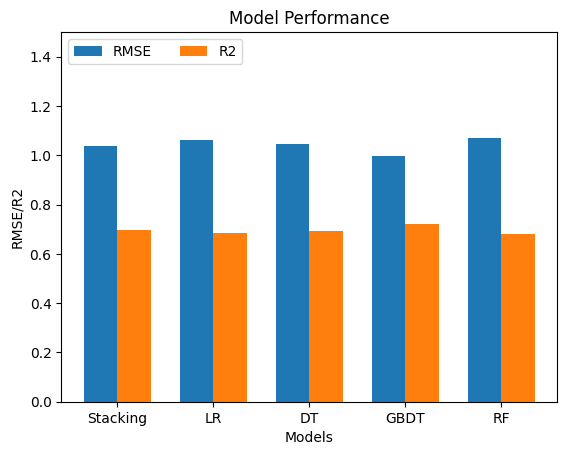

In [54]:
#Visualize the RMSE and R2 results

RMSE_Results = [stack_rmse, lr_rmse, dt_rmse, gbdt_rmse, rf_rmse]
R2_Results = [stack_r2, lr_r2, dt_r2, gbdt_r2, rf_r2]

rg = np.arange(5)
width=0.35

plt.bar(rg, RMSE_Results, width, label="RMSE")
plt.bar(rg+width, R2_Results, width, label='R2')

labels = ['Stacking','LR', 'DT', 'GBDT', 'RF']
plt.xticks(rg + width/2, labels)
plt.xlabel("Models")
plt.ylabel("RMSE/R2")
plt.ylim([0,1.5])
plt.title('Model Performance')
plt.legend(loc='upper left', ncol=2)
plt.show()

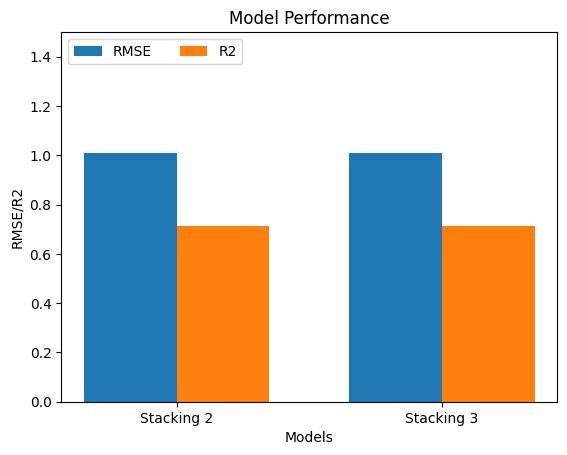

In [22]:
#Visualize the RMSE and R2 results

RMSE_Results = [snd_stack_rmse,third_stack_rmse]
R2_Results = [snd_stack_r2,third_stack_r2]

rg = np.arange(2)
width=0.35

plt.bar(rg, RMSE_Results, width, label="RMSE")
plt.bar(rg+width, R2_Results, width, label='R2')

labels = ['Stacking 2','Stacking 3']
plt.xticks(rg + width/2, labels)
plt.xlabel("Models")
plt.ylabel("RMSE/R2")
plt.ylim([0,1.5])
plt.title('Model Performance')
plt.legend(loc='upper left', ncol=2)
plt.show()

While each model has similar scores according to the two bar graphs, it is evident that GBDT had the best performance because it had the lowest RMSE and highest R2. Specifically, the values were RMSE: 0.995656311696802 and R2: 0.7217826527194424. For future adjustments, this model might benefit from additional relevant features to be trained on in order to make even more accurate predictions.

In [55]:
#Comparing the actual vs the (rounded) predicted number for accommodates based on the GBDT model
for i in range(10):
    print('Actual: {0}'.format(df['accommodates'][i]))
    print('Predicted: {0}' .format(round(y_gbdt_pred[i]))) 

Actual: 1
Predicted: 6
Actual: 3
Predicted: 2
Actual: 4
Predicted: 3
Actual: 2
Predicted: 2
Actual: 1
Predicted: 2
Actual: 2
Predicted: 3
Actual: 3
Predicted: 3
Actual: 1
Predicted: 2
Actual: 1
Predicted: 2
Actual: 4
Predicted: 6
